In [202]:
import random
from plotly import offline
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import numpy as np
import matplotlib.pyplot as plt
class Die():
    """Klasa przedstawiajaca pojedyncza kość do gry"""
    def __init__(self, num_sides=6):
        self.num_sides = num_sides
    
    def roll(self):
        return random.randint(1,self.num_sides)


            
def die_propability(n = 1):
    """ Calculating propability for each result in n die pulls """
    cube = np.full(shape=(n*6-n+1), fill_value=0, dtype=np.float32)
    prob = np.full(shape=6,fill_value=1/6,dtype=np.float32)
    result = np.full(shape=6*n, fill_value=0, dtype=np.float32)
    cube[0] = 1
    max_result = list(range(n,n*6+1))
    for m in range(0,n):
        for i, c in enumerate(cube):
            for j, k in enumerate(prob):
                try:
                    result[i+j] += k*c
                except IndexError:
                    pass
        for i, c in enumerate(cube):
            cube[i] = result[i]
            result[i] = 0
    return  cube, max_result


def die_roll(nb_dies, nb_rolls):

    results= []
    for _ in range(nb_rolls):
        x=0
        for _ in range(nb_dies):
            x += random.randint(1,6)
            
        results.append(x)

    
    frequencies = [ results.count(value) for value in range(nb_dies, nb_dies*6+1)]
    x_values = list(range(nb_dies,nb_dies*6+1))

    return frequencies, x_values


In [2]:
die = Die()

results = [ die.roll() for _ in range(1000)]
frequency = [ results.count(value) for value in range(1,die.num_sides+1)]
print(frequency)

[164, 165, 162, 176, 181, 152]


In [11]:
results = [ die.roll() for _ in range(1000)]
frequencies = [ results.count(value) for value in range(1,die.num_sides+1)]

x_values = list(range(1,die.num_sides+1))
data = [Bar(x=x_values, y=frequencies)]

x_axis_config = {'title': 'Wyniki'}
y_axis_config = {'title': 'Częstotliowość występowania wartości'}
my_layout = Layout(title='Wynik rzucania pojedyńczą koscią D6 tysiac razy',
            xaxis = x_axis_config, yaxis=y_axis_config)
offline.plot({'data':data,'layout':my_layout})

'temp-plot.html'

In [260]:
frequencies, x_values = die_roll(2,1000)
data = [go.Bar(x=x_values, y=frequencies)]
x_axis_config = {'title': 'Wyniki'}
y_axis_config = {'title': 'Częstotliowość występowania wartości'}
my_layout = go.Layout(title='Wynik rzucania pojedyńczą koscią D6 tysiac razy',
            xaxis = x_axis_config, yaxis=y_axis_config)
offline.plot({'data':data,'layout':my_layout})

'temp-plot.html'

In [267]:

frequencies, x_values = die_roll(3,10**5)
prob, x = die_propability(3)
fig = make_subplots(rows=2, cols=1)

fig.add_trace(
    go.Bar(x=x_values, y=np.array(frequencies)/10**5,
     name='Sample propability'),
    row=1, col=1
)
fig.add_trace(
    go.Bar(x=x, y=prob, name='Real propability'),
    row=2, col=1
)
fig.show()

Kosc o jednej sciance i 10

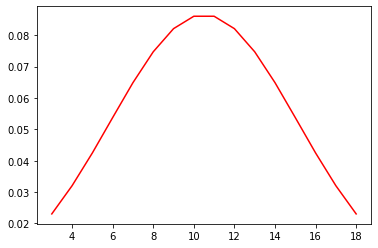

In [275]:
from scipy.stats import norm
s, ex = np.std(x),np.mean(x)
fig,ax = plt.subplots()
ax.plot(x, norm.pdf(x,ex,s), c='r')
plt.show()

In [113]:
die_1 = Die()
die_2 = Die(10)
results= [  die_1.roll() + die_2.roll() for _ in range(50000)]
max_result = die_1.num_sides + die_2.num_sides
frequencies = [ results.count(value) for value in range(2, max_result+1)]

x_values = list(range(2,max_result+1))
data = [go.Bar(x=x_values, y=frequencies)]
x_axis_config = {'title': 'Wyniki'}
y_axis_config = {'title': 'Częstotliowość występowania wartości'}
my_layout = go.Layout(title='Wynik rzucania pojedyńczą koscią D6 tysiac razy',
            xaxis = x_axis_config, yaxis=y_axis_config)

offline.plot({'data':data,'layout':my_layout})

'temp-plot.html'

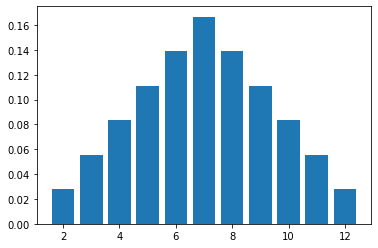

In [112]:


cube, max_result = die_propability(2)
fig, ax = plt.subplots()
ax.bar(max_result,cube)

plt.show()

0.044461656